### **Population and Displacement - Median Household Salary**

This dataset provides comprehensive insights into the median household salary trends over a 10-year period from 2013 to 2022. It captures detailed income data segmented across various demographic and household categories, offering valuable insights into socio-economic patterns and disparities. The dataset includes the following categories:

1.	Household Income by Race and Hispanic/Latino Origin: General households, segmented by racial and ethnic groups such as White, Black or African American, Asian, and Hispanic/Latino origin.

2.	Household Income by Age of Householder: Age groups ranging from 15–24 years to 65 years and over.

3.	Family Income Based on Household Composition: Families with or without children, married-couple families, and single-parent families headed by male or female householders.

4.	Family Income by Family Size: Income trends for families with sizes ranging from 2-person families to 7-or-more person families.

5.	Family Income by Number of Earners: Income distribution based on the number of earners in a family, from no earners to families with three or more earners.

6.	Non-Family Households: Non-family households categorized by gender and whether the householder is living alone or with others.


The analysis performed in this notebook aims to provide insights on the median salary of the population in District 7 across different groups, as well as a comparison with Boston City on the population income. The datasets can be found here: https://data.census.gov/table/ACSST1Y2023.S1903?q=household%20income

#### **1. Performing Data Preprocessing and Initial Analysis**

##### **1.1 Importing necessary libraries**

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

data = pd.read_csv("D7_median_salaries.csv")
data.head(10)

,Grouping,Year,Census Tract 102.06 - Number,Census Tract 102.06 - Percent Distribution,Census Tract 102.06 - Median Income,Census Tract 103 - Number,Census Tract 103 - Percent Distribution,Census Tract 103 - Median Income,Census Tract 104.03 - Number,Census Tract 104.03 - Percent Distribution,...,Census Tract 1202.01 - Median Income,Census Tract 1203.01 - Number,Census Tract 1203.01 - Percent Distribution,Census Tract 1203.01 - Median Income,Census Tract 9803 - Number,Census Tract 9803 - Percent Distribution,Census Tract 9803 - Median Income,Census Tract 9811 - Number,Census Tract 9811 - Percent Distribution,Census Tract 9811 - Median Income
0,Households,2022,1248.0,1248.00,64141.0,237.0,237.00,69861.0,1739.0,1739.00,...,98929.00,2059.00,2059.00,114627.00,0.00,0.00,-,4.00,4.00,-
1,White,2022,756.0,0.61,138611.0,138.0,0.58,62250.0,1103.0,0.63,...,128125.00,1091.00,0.53,139073.00,0.00,-,-,4.00,1.00,-
2,Black or African American,2022,156.0,0.13,0.0,18.0,0.08,0.0,36.0,0.02,...,-,309.00,0.15,-,0.00,-,-,0.00,0.00,-
3,American Indian and Alaska Native,2022,14.0,0.01,0.0,0.0,0.00,0.0,0.0,0.00,...,-,0.00,0.00,-,0.00,-,-,0.00,0.00,-
4,Asian,2022,130.0,0.10,0.0,32.0,0.14,101250.0,368.0,0.21,...,110406.00,92.00,0.05,198158.00,0.00,-,-,0.00,0.00,-
5,Native Hawaiian and Other Pacific Islander,2022,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,...,-,0.00,0.00,-,0.00,-,-,0.00,0.00,-
6,Some other race,2022,26.0,0.02,0.0,0.0,0.00,0.0,77.0,0.04,...,-,282.00,0.14,138362.00,0.00,-,-,0.00,0.00,-
7,Two or more races,2022,166.0,0.13,0.0,49.0,0.21,168194.0,155.0,0.09,...,-,285.00,0.14,76955.00,0.00,-,-,0.00,0.00,-
8,Hispanic or Latino origin (of any race),2022,275.0,0.22,0.0,65.0,0.27,0.0,234.0,0.14,...,-,501.00,0.24,88854.00,0.00,-,-,0.00,0.00,-
9,"White alone, not Hispanic or Latino",2022,632.0,0.51,152808.0,117.0,0.49,66250.0,990.0,0.57,...,129643.00,1037.00,0.50,141047.00,0.00,-,-,4.00,1.00,-


##### **1.2 Converting all data columns to numeric for analysis**

In [153]:
number_cols = [col for col in data.columns if "Number" in col]
for col in number_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

percent_cols = [col for col in data.columns if "Percent Distribution" in col]
for col in percent_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

income_cols = [col for col in data.columns if "Median Income" in col]
for col in income_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

##### **1.3 Aggregating all census tract columns for trend analysis**

In [154]:
data['Number'] = data[number_cols].mean(axis=1)

data['Percent Distribution'] = (
    data[percent_cols].mean(axis=1)
)

data['Median Income'] = (
    data[income_cols].mean(axis=1)
)

/var/folders/n5/_35mdxvd5tg02wjzpxdfqp0m0000gn/T/ipykernel_95670/2572841279.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Number'] = data[number_cols].mean(axis=1)
/var/folders/n5/_35mdxvd5tg02wjzpxdfqp0m0000gn/T/ipykernel_95670/2572841279.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Percent Distribution'] = (
/var/folders/n5/_35mdxvd5tg02wjzpxdfqp0m0000gn/T/ipykernel_95670/2572841279.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [156]:
columns_to_keep = ['Grouping', 'Year', 'Number', 'Percent Distribution', 'Median Income']
data = data[columns_to_keep]

In [157]:
data.head(10)

,Grouping,Year,Number,Percent Distribution,Median Income
0,Households,2022,1291.200000,1291.200000,62562.214286
1,White,2022,457.911111,0.361818,113178.310345
2,Black or African American,2022,435.333333,0.333182,46541.571429
3,American Indian and Alaska Native,2022,5.466667,0.004773,0.000000
4,Asian,2022,100.311111,0.076136,83744.736842
5,Native Hawaiian and Other Pacific Islander,2022,3.266667,0.002273,0.000000
6,Some other race,2022,138.155556,0.101591,42843.869565
7,Two or more races,2022,150.755556,0.123409,54251.291667
8,Hispanic or Latino origin (of any race),2022,306.977778,0.237727,44860.346154
9,"White alone, not Hispanic or Latino",2022,403.200000,0.317500,116531.666667


##### **1.4 Forming categories for trend analysis**

In [158]:
race_categories = [
    'White', 'Black or African American', 
    'American Indian and Alaska Native', 'Asian', 
    'Native Hawaiian and Other Pacific Islander', 'Some other race',
    'Two or more races', 'Hispanic or Latino origin (of any race)',
    'White alone, not Hispanic or Latino'
]
group1_data = data[data['Grouping'].isin(race_categories)]

age_categories = ['15 to 24 years', '25 to 44 years', '45 to 64 years', '65 years and over']
group2_data = data[data['Grouping'].isin(age_categories)]

family_categories = [
    'With own children of householder under 18 years',
    'With no own children of householder under 18 years', 'Married-couple families',
    'With own children under 18 years', 'Female householder, no spouse present',
    'Male householder, no spouse present'
]
group3_data = data[data['Grouping'].isin(family_categories)]

family_size_categories = [
    '2-person families', '3-person families', '4-person families',
    '5-person families', '6-person families', '7-or-more person families'
]
group4_data = data[data['Grouping'].isin(family_size_categories)]

earner_categories = ['No earners', '1 earner', '2 earners', '3 or more earners']
group5_data = data[data['Grouping'].isin(earner_categories)]

nonfamily_categories = [
    'Nonfamily households', 'Female householder', 'Living alone', 
    'Not living alone', 'Male householder'
]
group6_data = data[data['Grouping'].isin(nonfamily_categories)]

income_categories = [
    'Household income in the past 12 months',
    'Family income in the past 12 months',
    'Nonfamily income in the past 12 months'
]
group7_9_data = data[data['Grouping'].isin(income_categories)]

#### **2. Trend Analysis over 10 years for District 7**

##### **2.1 Household Income by Race**

/var/folders/n5/_35mdxvd5tg02wjzpxdfqp0m0000gn/T/ipykernel_95670/3698359573.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


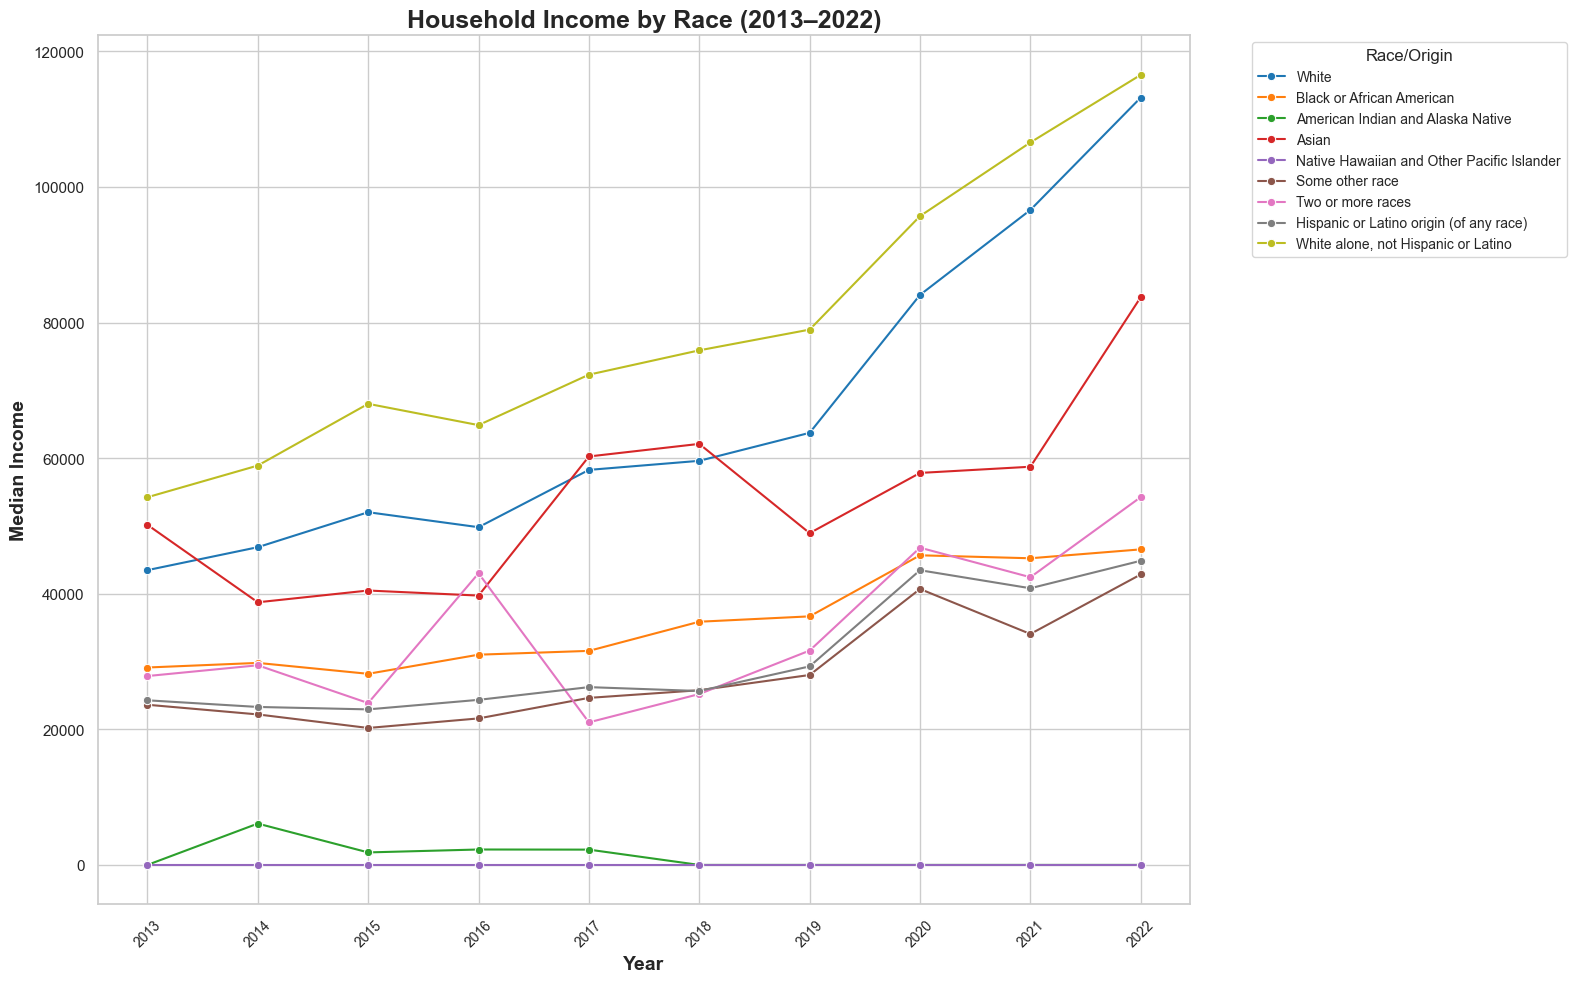

In [159]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10)) 
sns.lineplot(
    data=group1_data,
    x='Year',
    y='Median Income',
    hue='Grouping',
    ci=None,
    marker='o',
    palette='tab10'
)
plt.title('Household Income by Race (2013–2022)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Median Income', fontsize=14, fontweight='bold')
plt.xticks(sorted(group1_data['Year'].unique()), rotation=45, fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Race/Origin', fontsize=10)
plt.tight_layout()
plt.show()

##### **Insights:**

- Most racial and ethnic groups have shown a steady increase in median household income from 2013 to 2022, with notable growth for Asian and Hispanic or Latino households in recent years.
- White alone, not Hispanic or Latino and White households consistently earn the highest incomes, while American Indian and Alaska Native and Native Hawaiian and Other Pacific Islander households remain the lowest earners, highlighting persistent income inequality.
- Despite overall income growth, the gap between the highest and lowest earners has widened over the years, indicating that economic gains have not been equitably distributed.

##### **2.2 Household Income by age of householder**

/var/folders/n5/_35mdxvd5tg02wjzpxdfqp0m0000gn/T/ipykernel_95670/1061450746.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


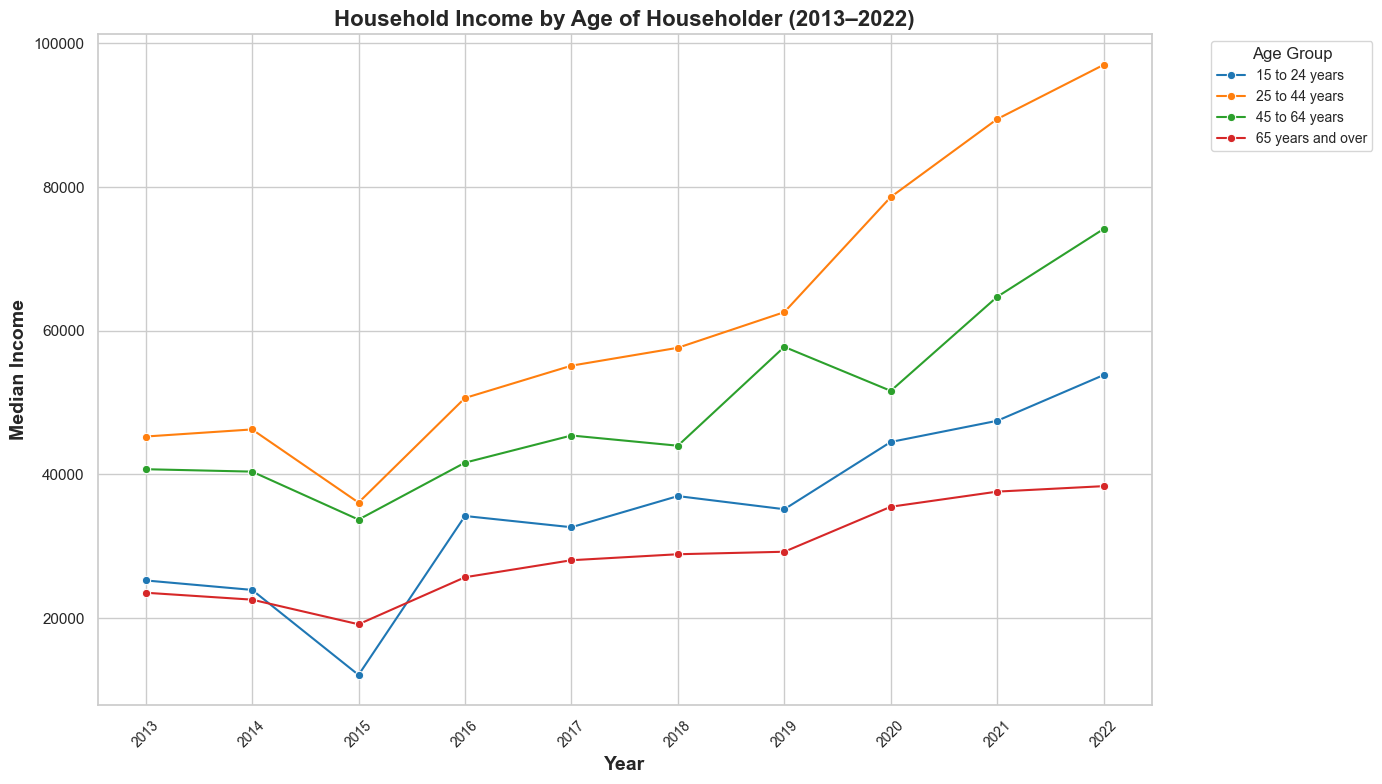

In [160]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=group2_data,
    x='Year',
    y='Median Income',
    hue='Grouping',
    ci=None,
    marker='o',  
    palette='tab10' 
)
plt.xticks(sorted(group2_data['Year'].unique()), rotation=45, fontsize=10)
plt.title('Household Income by Age of Householder (2013–2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Median Income', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Age Group', fontsize=10)
plt.tight_layout()
plt.show()

##### **Insights:**

- Householders aged 45 to 64 years have the highest median income, followed by those aged 25 to 44 years, indicating that middle-aged individuals are in their prime earning years.
- All age groups show a general upward trend in median income from 2013 to 2022, reflecting economic growth over time.
- The youngest age group (15 to 24 years) and the oldest age group (65 years and over) consistently earn significantly lower median incomes compared to middle-aged groups, highlighting income disparities based on age.

##### **2.3 Family Income based on household composition**

/var/folders/n5/_35mdxvd5tg02wjzpxdfqp0m0000gn/T/ipykernel_95670/364398140.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


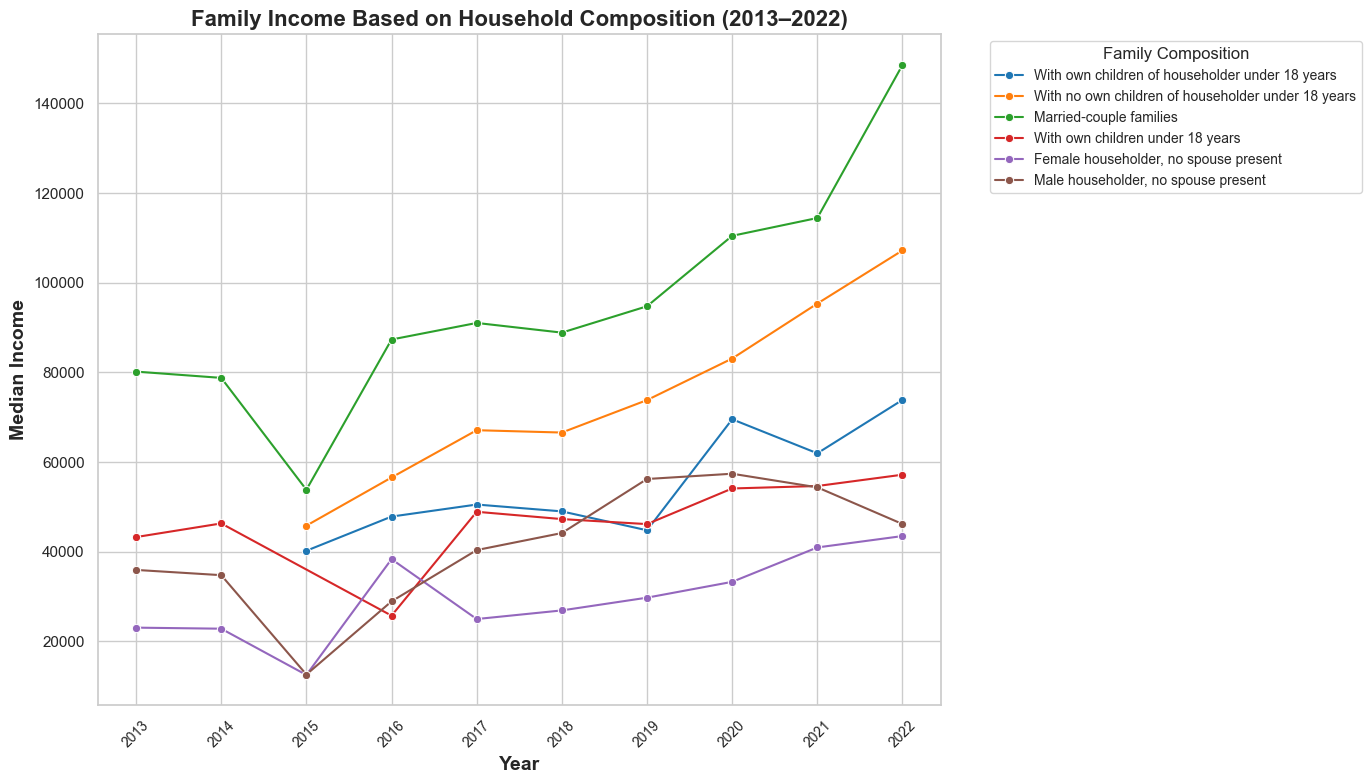

In [161]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=group3_data,
    x='Year',
    y='Median Income',
    hue='Grouping',
    ci=None,
    marker='o',  
    palette='tab10'  
)
plt.xticks(sorted(group3_data['Year'].unique()), rotation=45, fontsize=10)
plt.title('Family Income Based on Household Composition (2013–2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Median Income', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Family Composition', fontsize=10)
plt.tight_layout()
plt.show()

##### **Insights:**

- Married-couple families consistently have the highest median income among all family compositions, with a significant increase observed over the years, reaching over $140,000 in 2022.
- Families headed by a female householder with no spouse present and male householder with no spouse present exhibit significantly lower median incomes, highlighting economic disparities based on household structure.
- Despite variations in absolute income, all family composition categories show a positive income trend from 2013 to 2022, indicating overall economic improvement across family types.

##### **2.4 Family Income by family size**

/var/folders/n5/_35mdxvd5tg02wjzpxdfqp0m0000gn/T/ipykernel_95670/1968770247.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


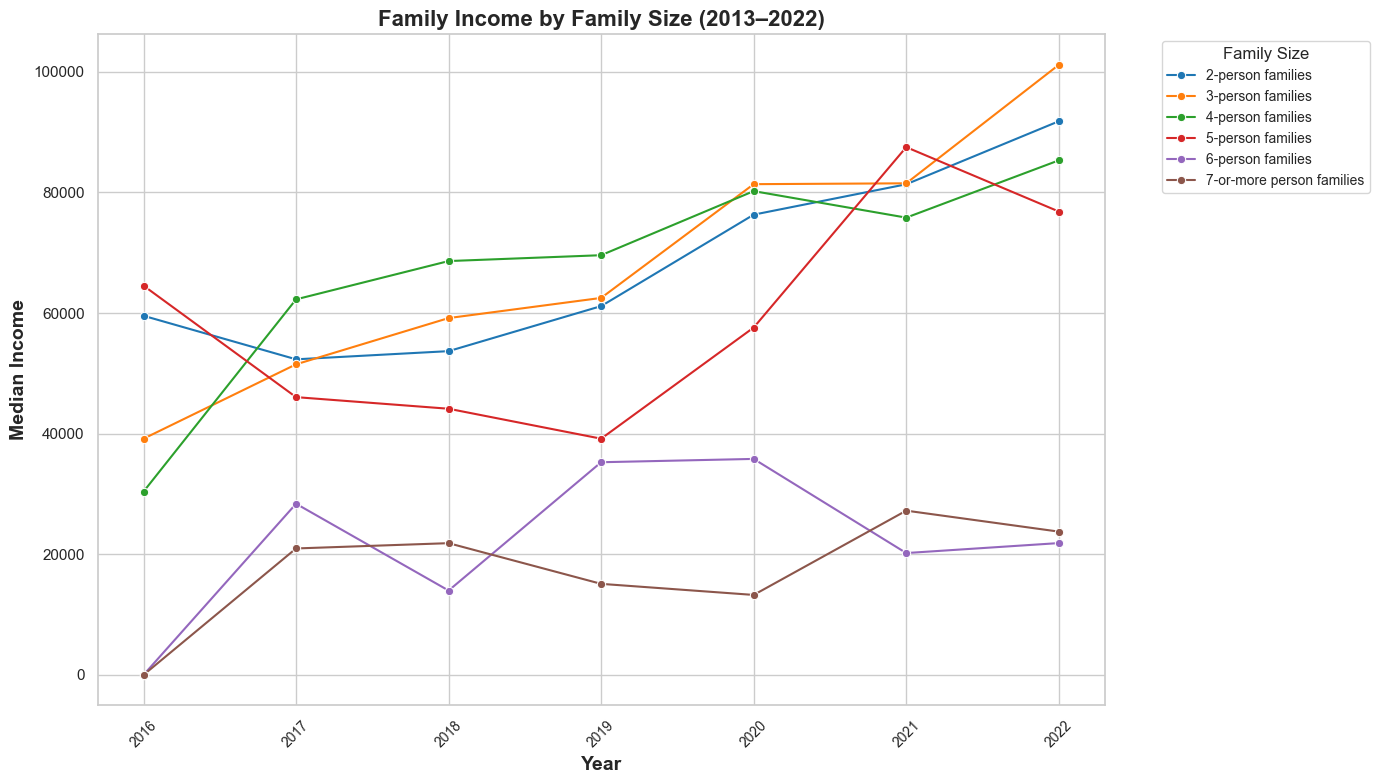

In [162]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))  
sns.lineplot(
    data=group4_data,
    x='Year',
    y='Median Income',
    hue='Grouping',
    ci=None,
    marker='o', 
    palette='tab10'
)
plt.xticks(sorted(group4_data['Year'].unique()), rotation=45, fontsize=10)
plt.title('Family Income by Family Size (2013–2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Median Income', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Family Size', fontsize=10)
plt.tight_layout()
plt.show()

##### **Insights:**

- 2-person families and 3-person families consistently have higher median incomes compared to larger family sizes, particularly evident in recent years, highlighting the economic benefits of smaller household sizes.
- 2-person and 3-person families show a steady increase in median income from 2016 to 2022, reflecting broader economic growth. Larger families (5-person or more) show slower growth, indicating potential economic strain in larger households.
-  6-person families and 7-or-more person families consistently exhibit the lowest median incomes across all years, indicating financial challenges faced by households with more dependents.

##### **2.5 Family Income by number of earners**

/var/folders/n5/_35mdxvd5tg02wjzpxdfqp0m0000gn/T/ipykernel_95670/3866486010.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


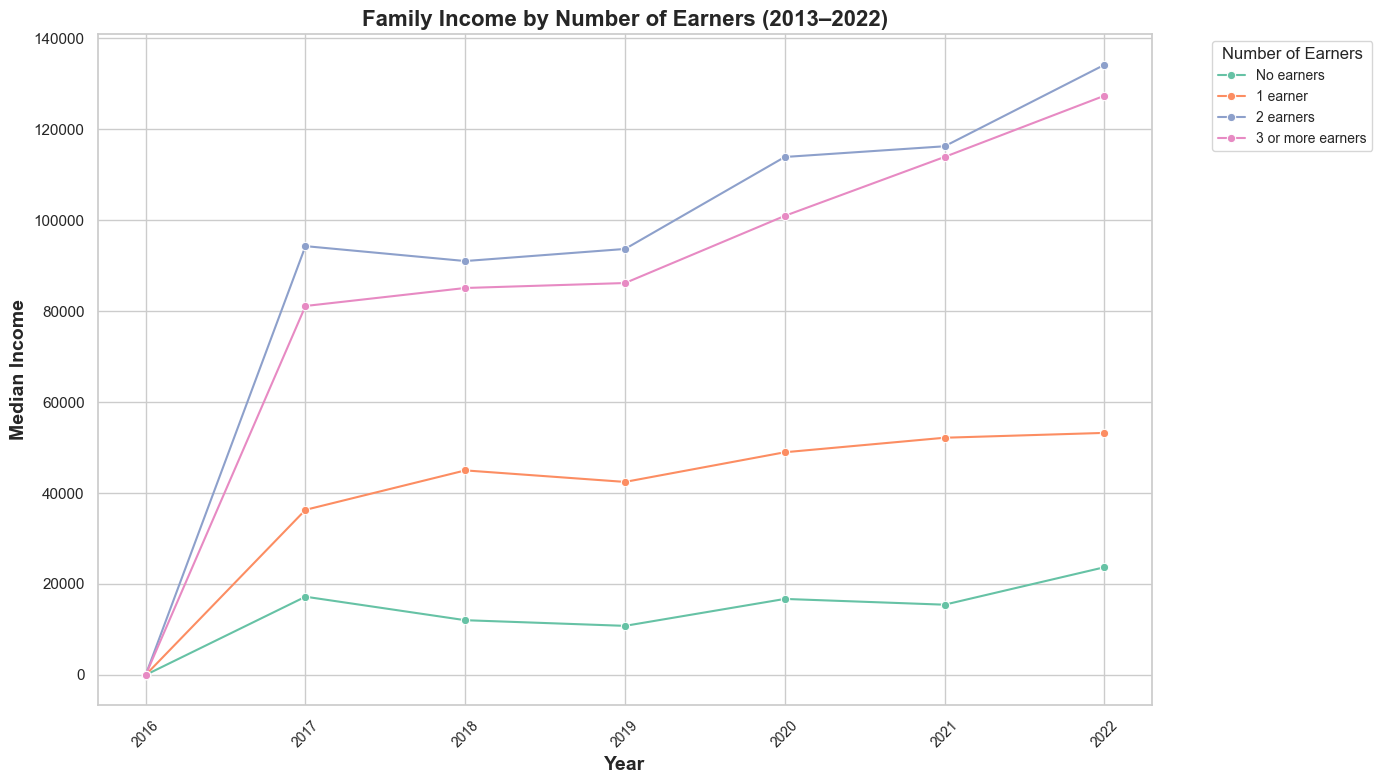

In [163]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))  
sns.lineplot(
    data=group5_data,
    x='Year',
    y='Median Income',
    hue='Grouping',
    ci=None,
    marker='o',  
    palette='Set2'  
)
plt.xticks(sorted(group5_data['Year'].unique()), rotation=45, fontsize=10)
plt.title('Family Income by Number of Earners (2013–2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Median Income', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Number of Earners', fontsize=10)
plt.tight_layout()
plt.show()

##### **Insights:**

-  Households with 2 earners and 3 or more earners consistently show significantly higher median incomes, with 3 or more earners reaching approximately $140,000 by 2022. This highlights the financial benefits of multiple income sources in a family.
- Households with 1 earner or no earners show relatively flat growth in median incomes, with no earners remaining at the lowest level, under $20,000 annually, indicating limited financial stability.
- The relative order of median incomes across the categories remains consistent from 2016 to 2022, emphasizing the economic advantage of having multiple earners in a household.

##### **2.6 Nonfamily Household Income trends**

/var/folders/n5/_35mdxvd5tg02wjzpxdfqp0m0000gn/T/ipykernel_95670/949646830.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


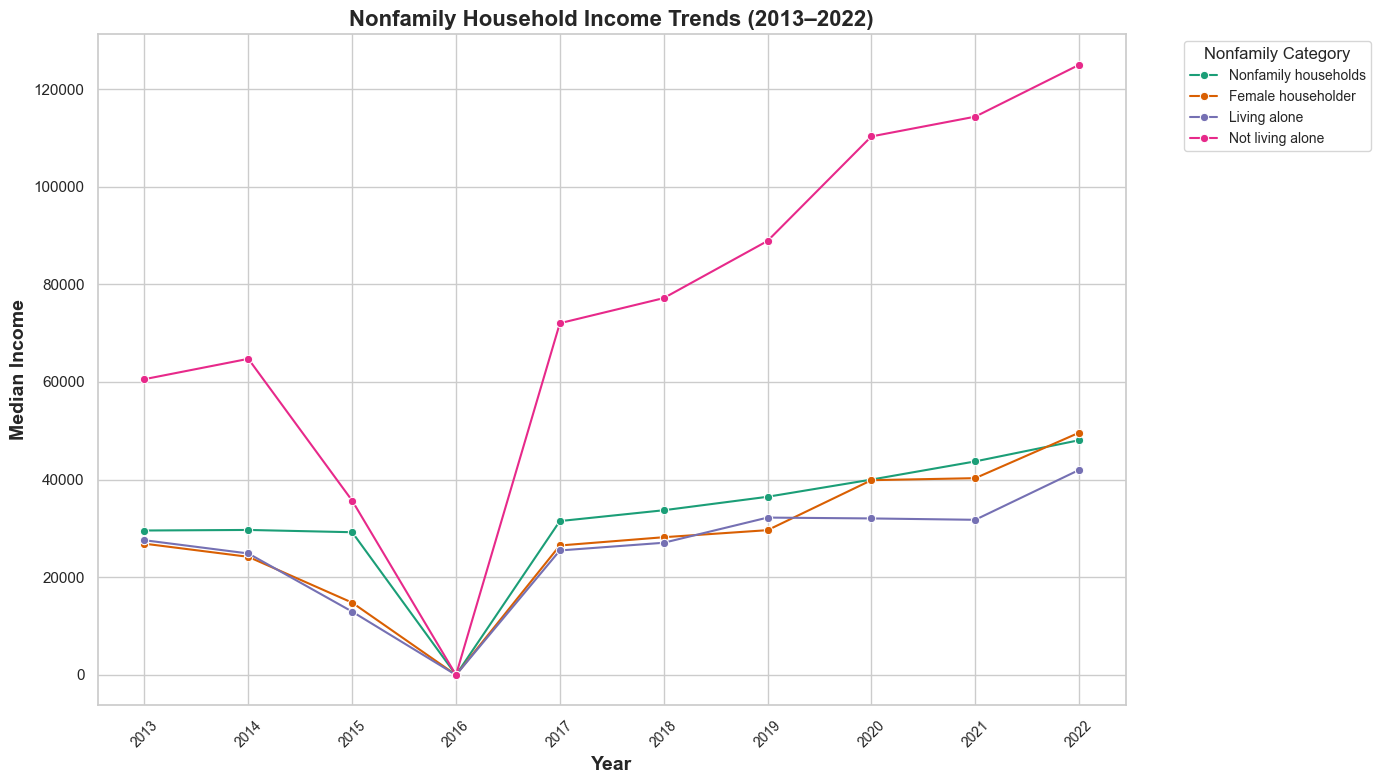

In [258]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=group6_data,
    x='Year',
    y='Median Income',
    hue='Grouping',
    ci=None,
    marker='o', 
    palette='Dark2'  
)
plt.xticks(sorted(group6_data['Year'].unique()), rotation=45, fontsize=10)
plt.title('Nonfamily Household Income Trends (2013–2022)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Median Income', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Nonfamily Category', fontsize=10)
plt.tight_layout()
plt.show()

##### **Insights:**

- Nonfamily households classified as “Not living alone” consistently show the highest median income, peaking at approximately $120,000 in 2022. This suggests shared living arrangements significantly improve financial stability.
- Nonfamily households, female householders, and living alone categories exhibit gradual growth in median income over the years, with living alone consistently at the lower end of the spectrum, highlighting the financial challenges faced by individuals in single-occupancy homes.
- All categories experienced a significant drop in 2016 but recovered afterward, with “Not living alone” showing the steepest growth trajectory, emphasizing the resilience of shared household arrangements.

#### **3. Comparison with the median income trend for Boston City**

##### **3.1 Data Preprocessing**

In [208]:
city_data = pd.read_csv("Boston_median_salaries.csv")         

In [209]:
race_categories = [
    'White', 'Black or African American', 
    'American Indian and Alaska Native', 'Asian', 
    'Native Hawaiian and Other Pacific Islander', 'Some other race',
    'Two or more races', 'Hispanic or Latino origin (of any race)',
    'White alone, not Hispanic or Latino'
]
group1_citydata = city_data[city_data['Grouping'].isin(race_categories)]

age_categories = ['15 to 24 years', '25 to 44 years', '45 to 64 years', '65 years and over']
group2_citydata = city_data[city_data['Grouping'].isin(age_categories)]

family_categories = [
    'With own children of householder under 18 years',
    'With no own children of householder under 18 years', 'Married-couple families',
    'With own children under 18 years', 'Female householder, no spouse present',
    'Male householder, no spouse present'
]
group3_citydata = city_data[city_data['Grouping'].isin(family_categories)]

family_size_categories = [
    '2-person families', '3-person families', '4-person families',
    '5-person families', '6-person families', '7-or-more person families'
]
group4_citydata = city_data[city_data['Grouping'].isin(family_size_categories)]

earner_categories = ['No earners', '1 earner', '2 earners', '3 or more earners']
group5_citydata = city_data[city_data['Grouping'].isin(earner_categories)]

nonfamily_categories = [
    'Nonfamily households', 'Female householder', 'Living alone', 
    'Not living alone', 'Male householder'
]
group6_citydata = city_data[city_data['Grouping'].isin(nonfamily_categories)]


In [210]:
city_data.head(10)

,Grouping,Year,Number,Percent Distribution,Median Income
0,Households,2022.0,276053.00,276053.00,89212.00
1,White,2022.0,149539.00,0.54,120776.00
2,Black or African American,2022.0,56060.00,0.20,56673.00
3,American Indian and Alaska Native,2022.0,779.00,0.00,64821.00
4,Asian,2022.0,26885.00,0.10,69936.00
5,Native Hawaiian and Other Pacific Islander,2022.0,274.00,0.00,250000.00
6,Some other race,2022.0,15965.00,0.06,41669.00
7,Two or more races,2022.0,26551.00,0.10,61809.00
8,Hispanic or Latino origin (of any race),2022.0,45414.00,0.17,49496.00
9,"White alone, not Hispanic or Latino",2022.0,139001.00,0.50,125453.00


In [211]:
number_cols = [col for col in city_data.columns if "Number" in col]
for col in number_cols:
    city_data[col] = pd.to_numeric(data[col], errors='coerce')

percent_cols = [col for col in city_data.columns if "Percent Distribution" in col]
for col in percent_cols:
    city_data[col] = pd.to_numeric(data[col], errors='coerce')

income_cols = [col for col in city_data.columns if "Median Income" in col]
for col in income_cols:
    city_data[col] = pd.to_numeric(data[col], errors='coerce')

In [212]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Grouping              376 non-null    object 
 1   Year                  361 non-null    float64
 2   Number                376 non-null    float64
 3   Percent Distribution  376 non-null    float64
 4   Median Income         376 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.8+ KB


##### **3.2 Median Income trends by race (D7 vs Boston city)**

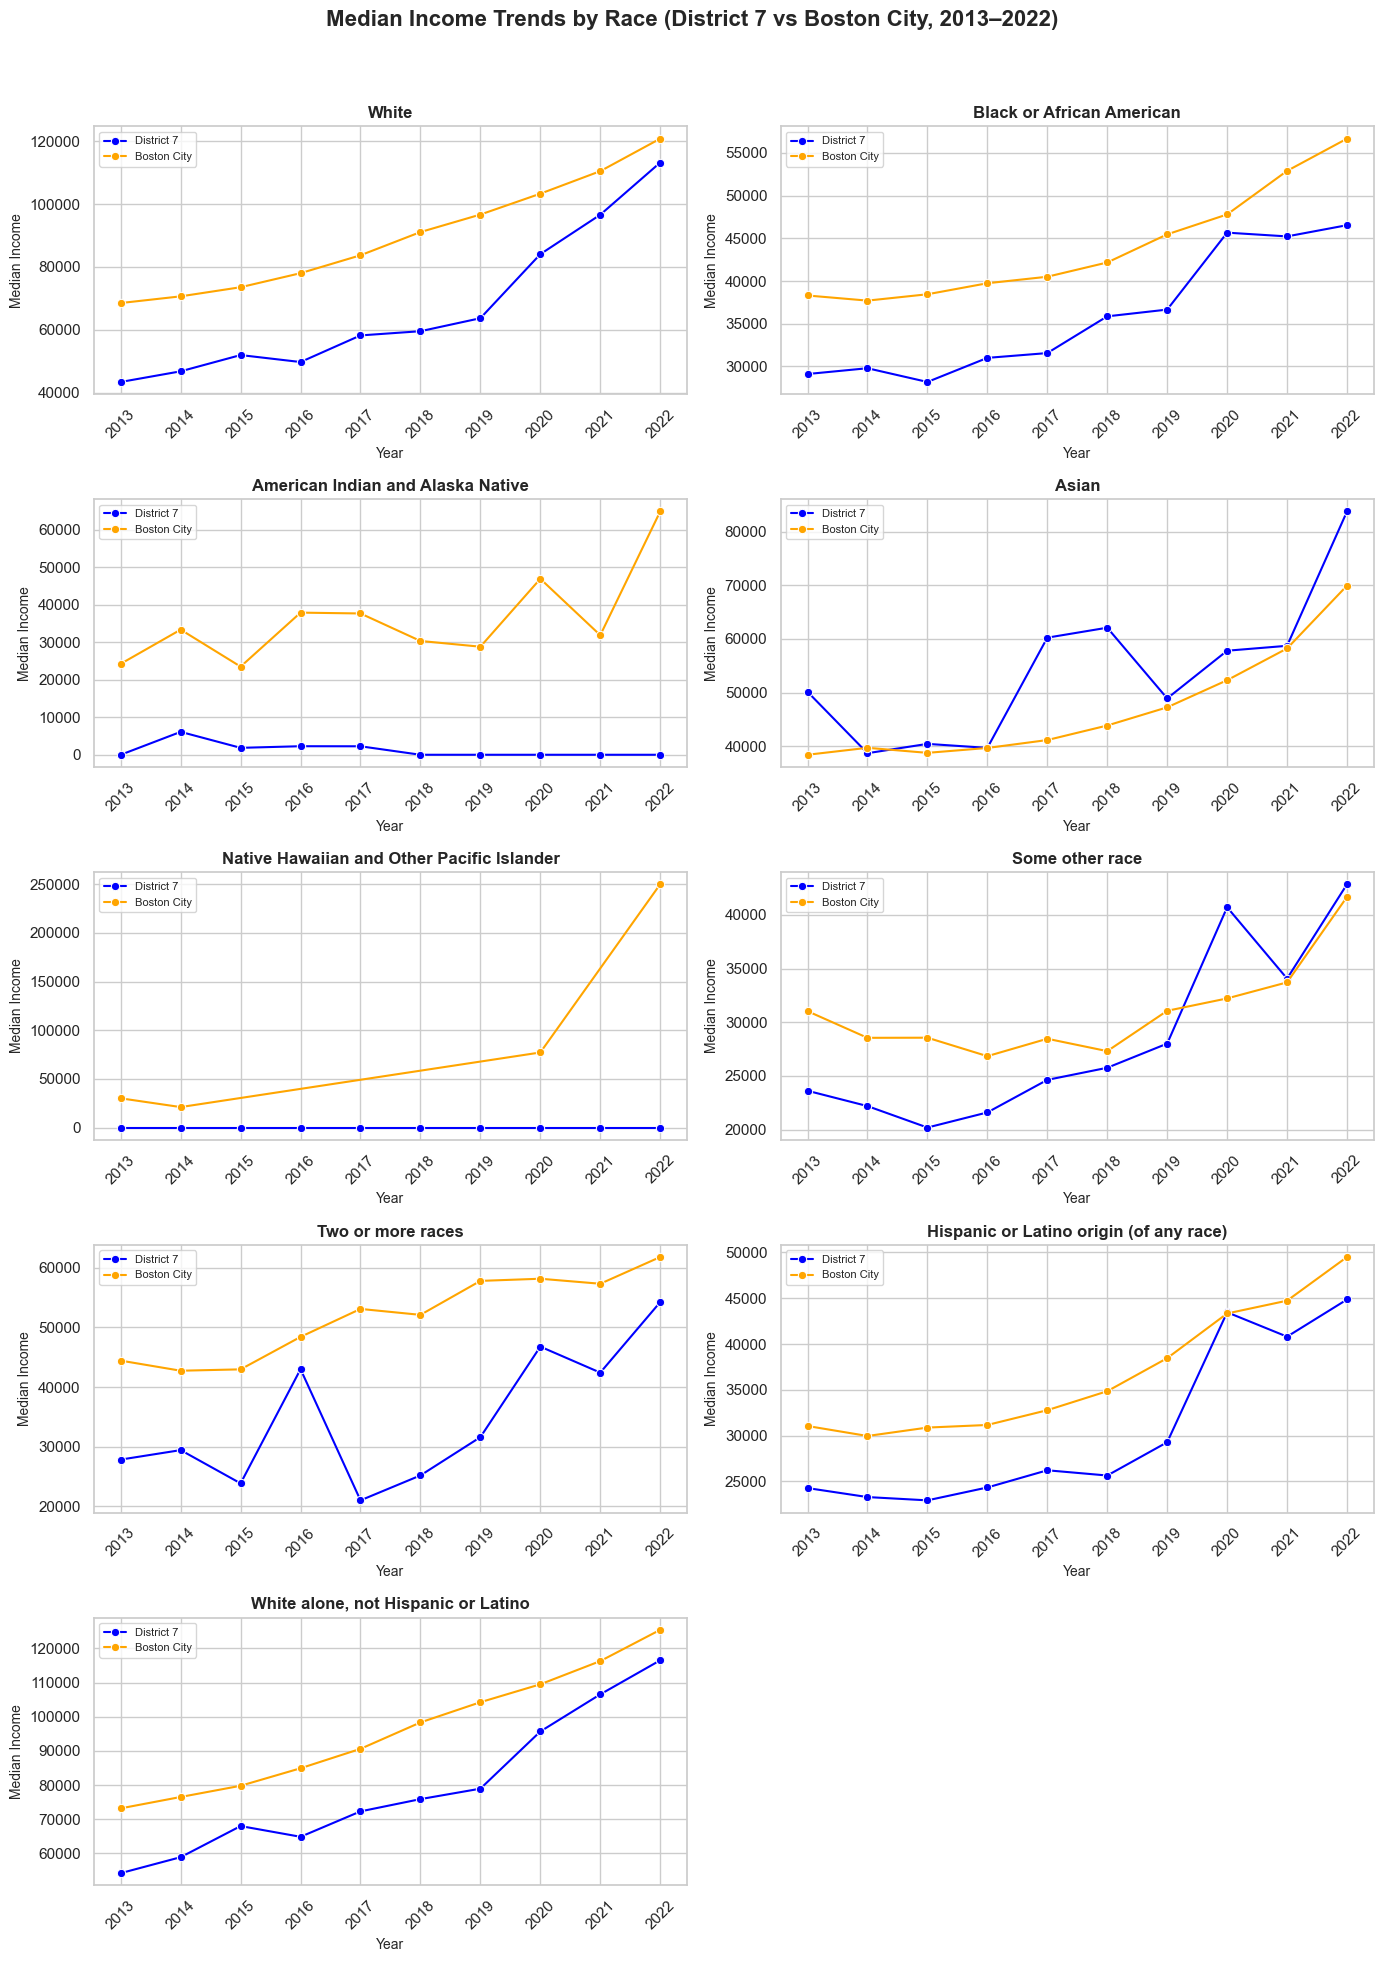

In [226]:
sns.set_theme(style="whitegrid")
race_categories = [
    'White', 'Black or African American', 
    'American Indian and Alaska Native', 'Asian', 
    'Native Hawaiian and Other Pacific Islander', 'Some other race',
    'Two or more races', 'Hispanic or Latino origin (of any race)',
    'White alone, not Hispanic or Latino'
]

n_categories = len(race_categories)
n_cols = 2 
n_rows = math.ceil(n_categories / n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharey=False)
axes = axes.flatten() 

# Loop through each race category and respective subplot
for i, race in enumerate(race_categories):
    district_race_data = group1_data[group1_data['Grouping'] == race]
    city_race_data = group1_citydata[group1_citydata['Grouping'] == race]

    sns.lineplot(
        data=district_race_data,
        x='Year',
        y='Median Income',
        marker='o',
        label=f'District 7',
        color='blue',
        ax=axes[i]  
    )
    sns.lineplot(
        data=city_race_data,
        x='Year',
        y='Median Income',
        marker='o',
        label=f'Boston City',
        color='orange',
        ax=axes[i]  
    )
    axes[i].set_title(f'{race}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylabel('Median Income', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xticks(sorted(group1_data['Year'].unique())) 
    axes[i].legend(fontsize=8)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Median Income Trends by Race (District 7 vs Boston City, 2013–2022)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

##### **Insights:**

The plots show a consistent disparity in median income trends between District 7 and Boston City across all racial and ethnic categories from 2013 to 2022. Boston City exhibits significantly higher median incomes across all groups, with “White alone, not Hispanic or Latino” and “White” households showing the steepest growth trajectories and the highest overall incomes. 

In contrast, District 7 displays much lower income levels for all groups, though the trends generally reflect steady growth over time, particularly in categories like “White” and “Asian.” Categories such as “Native Hawaiian and Other Pacific Islander” and “American Indian and Alaska Native” in District 7 have persistently low incomes, often showing minimal variation. The income gap between District 7 and Boston City highlights persistent socioeconomic inequities, with Boston City providing a stronger financial baseline across racial and ethnic demographics. Notably, District 7 does show signs of growth in some categories, but the overall gap remains significant.

##### **3.3 Median Income trends by Age group (D7 vs Boston city)**

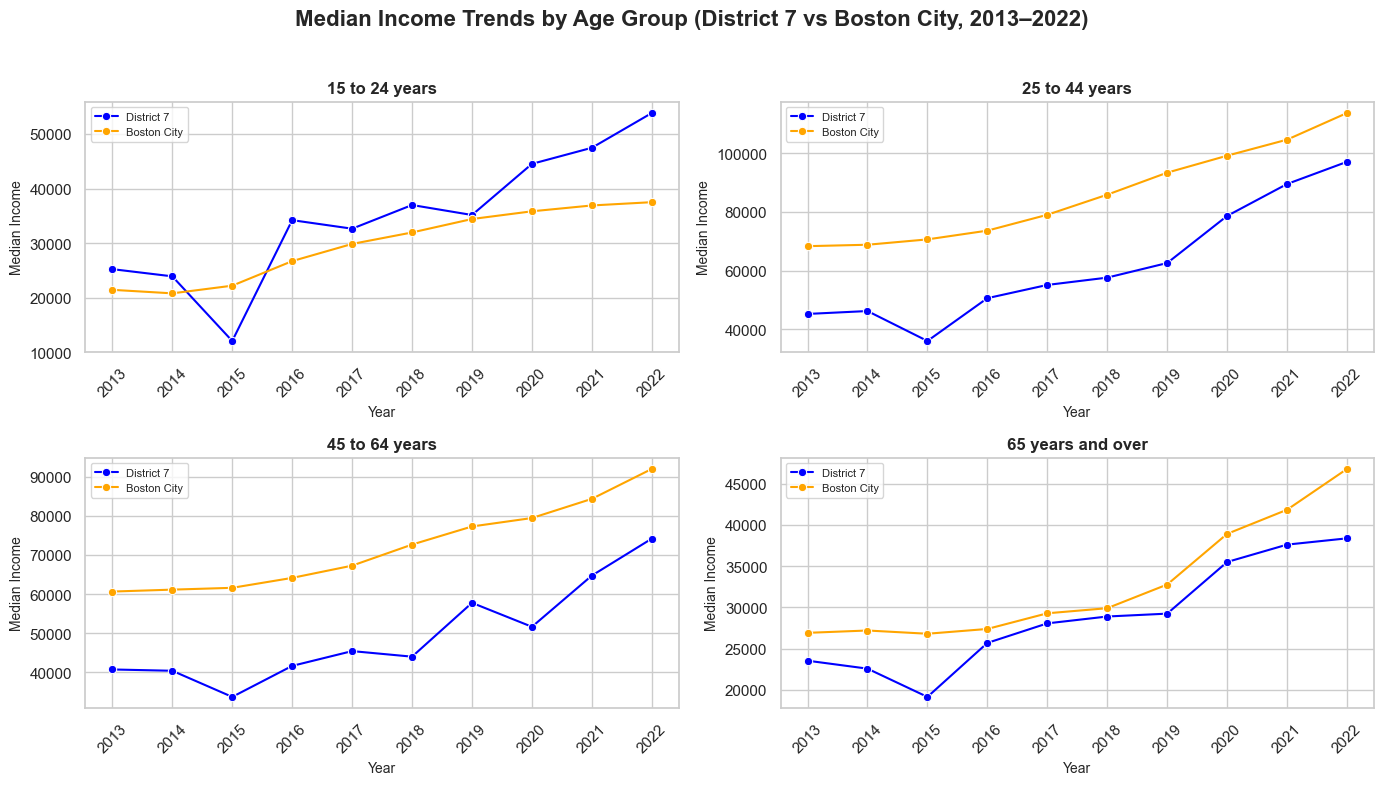

In [238]:
sns.set_theme(style="whitegrid")
age_categories = ['15 to 24 years', '25 to 44 years', '45 to 64 years', '65 years and over']

n_categories = len(age_categories)
n_cols = 2  
n_rows = math.ceil(n_categories / n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharey=False)
axes = axes.flatten()  

# Loop through each age category and respective subplot
for i, age_group in enumerate(age_categories):
    district_age_data = group2_data[group2_data['Grouping'] == age_group]
    city_age_data = group2_citydata[group2_citydata['Grouping'] == age_group]
    
    if not district_age_data.empty:
        sns.lineplot(
            data=district_age_data,
            x='Year',
            y='Median Income',
            marker='o',
            label=f'District 7',
            color='blue',
            ax=axes[i] 
        )
    if not city_age_data.empty:
        sns.lineplot(
            data=city_age_data,
            x='Year',
            y='Median Income',
            marker='o',
            label=f'Boston City',
            color='orange',
            ax=axes[i] 
        )
    axes[i].set_title(f'{age_group}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylabel('Median Income', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xticks(sorted(group2_data['Year'].dropna().unique()))  
    handles, labels = axes[i].get_legend_handles_labels()
    if handles:
        axes[i].legend(fontsize=8, loc='upper left')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Median Income Trends by Age Group (District 7 vs Boston City, 2013–2022)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

##### **Insights:**

The plot highlights clear income disparities by age group between District 7 and Boston City. For “15 to 24 years,” District 7 shows a steady rise in median income after 2015, surpassing Boston City by 2022. In the “25 to 44 years” and “45 to 64 years” groups, Boston City consistently outpaces District 7, though both exhibit upward trends over time. For “65 years and over,” the income gap narrows significantly, with District 7 showing substantial growth in recent years, nearly matching Boston City by 2022. These patterns underscore both progress and persistent income gaps across age demographics.

##### **3.4 Median income trends by family composition (D7 vs Boston city)**

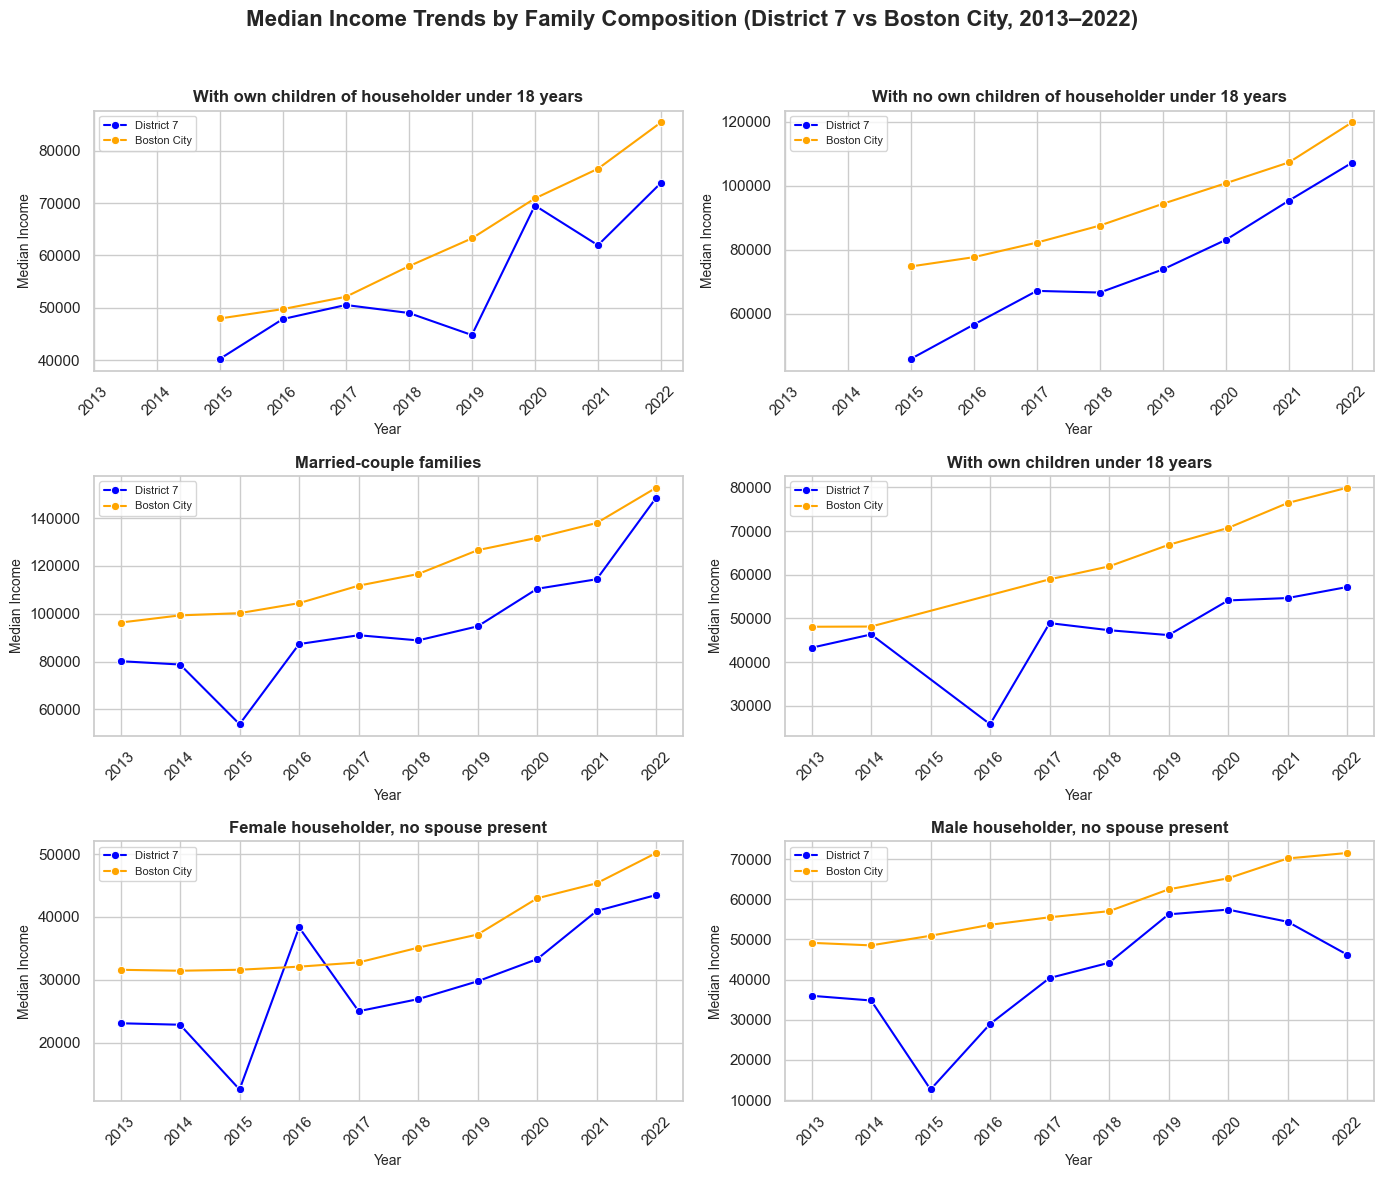

In [253]:
sns.set_theme(style="whitegrid")
family_categories = [
    'With own children of householder under 18 years',
    'With no own children of householder under 18 years', 
    'Married-couple families',
    'With own children under 18 years', 
    'Female householder, no spouse present',
    'Male householder, no spouse present'
]

n_categories = len(family_categories)
n_cols = 2  
n_rows = math.ceil(n_categories / n_cols)  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharey=False)
axes = axes.flatten() 

# Loop through each family category and respective subplot
for i, family_group in enumerate(family_categories):
    district_family_data = group3_data[group3_data['Grouping'] == family_group]
    city_family_data = group3_citydata[group3_citydata['Grouping'] == family_group]

    if not district_family_data.empty:
        sns.lineplot(
            data=district_family_data,
            x='Year',
            y='Median Income',
            marker='o',
            label='District 7',
            color='blue',
            ax=axes[i],
            errorbar = None  
        )
    if not city_family_data.empty:
        sns.lineplot(
            data=city_family_data,
            x='Year',
            y='Median Income',
            marker='o',
            label='Boston City',
            color='orange',
            ax=axes[i],
            errorbar = None 
        )
    
    axes[i].set_title(f'{family_group}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylabel('Median Income', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    unique_years = sorted(group3_data['Year'].dropna().unique())
    axes[i].set_xticks(unique_years)
    handles, labels = axes[i].get_legend_handles_labels()
    if handles:
        axes[i].legend(fontsize=8, loc='upper left')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Median Income Trends by Family Composition (District 7 vs Boston City, 2013–2022)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

##### **Insights:**

The plot reveals clear income disparities between District 7 and Boston City across various family compositions. For families “with no own children under 18 years” and “married-couple families,” Boston City maintains a significant income advantage throughout the years, though District 7 shows consistent growth, narrowing the gap slightly by 2022. Families “with own children under 18 years” and households with “female householder, no spouse present” in District 7 display a marked increase in median income post-2015, but still lag behind Boston City. 

Interestingly, the income of households with “male householder, no spouse present” in District 7 shows more volatility but continues an upward trend, mirroring the citywide growth. Overall, the plots highlight District 7’s income growth across all compositions, though persistent disparities with Boston City remain.

##### **3.5 Median Income trends by family size (D7 vs Boston city)**

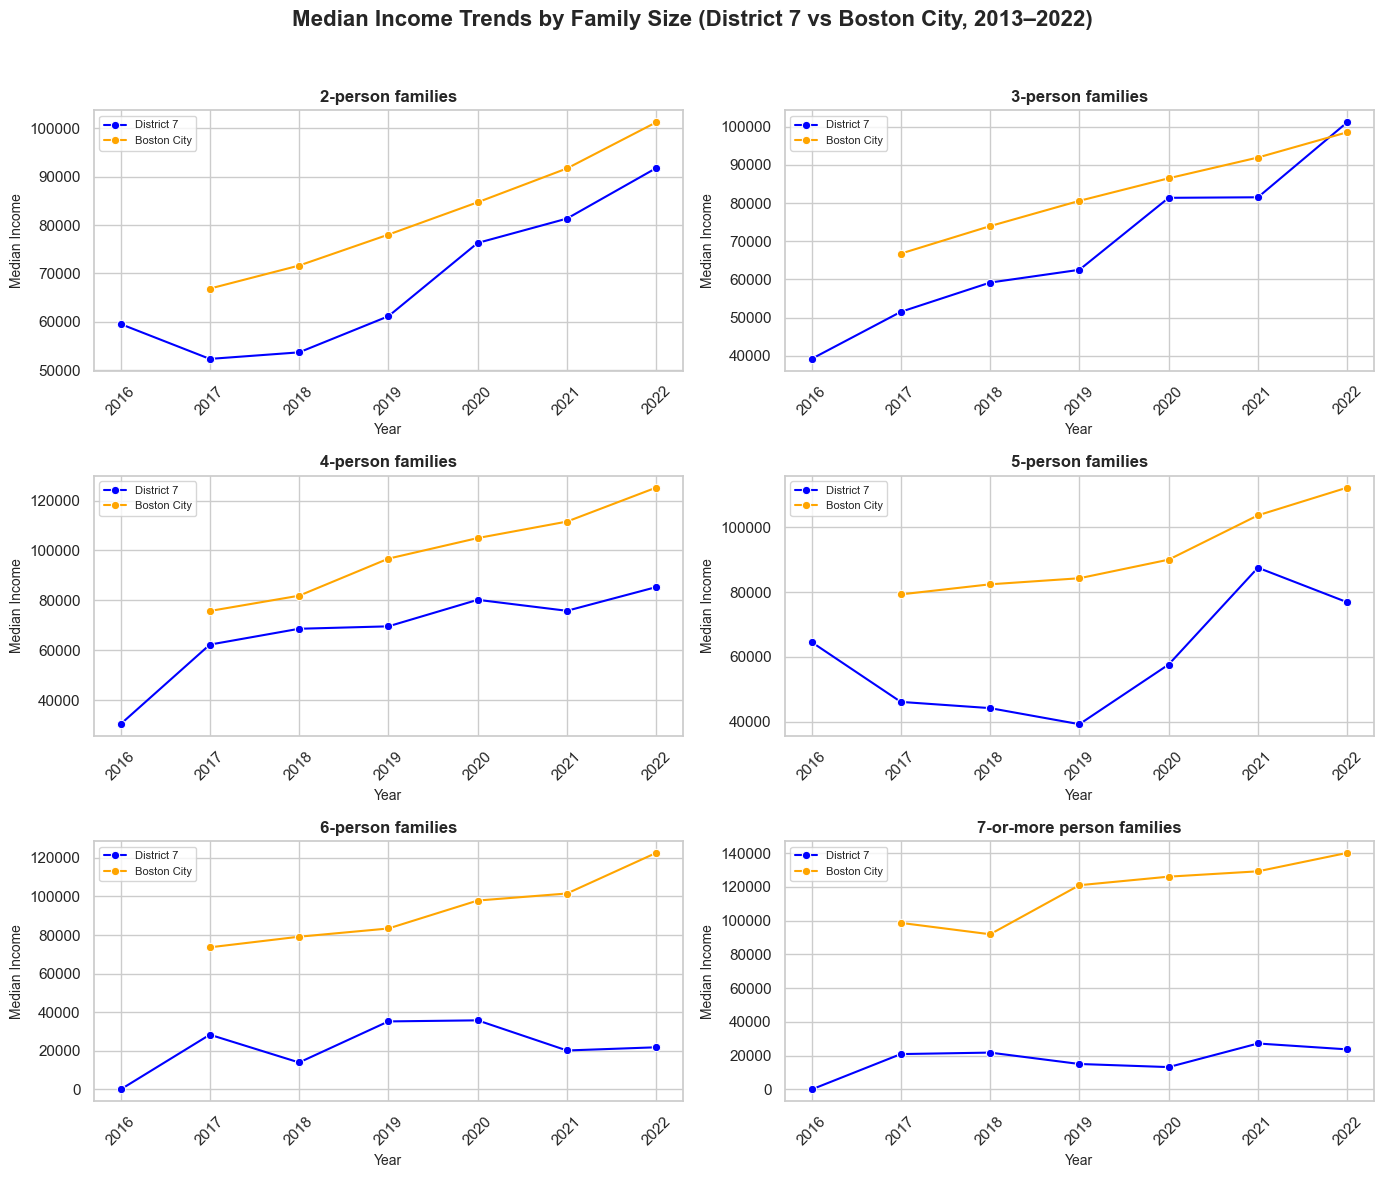

In [254]:
sns.set_theme(style="whitegrid")
family_size_categories = [
    '2-person families', '3-person families', '4-person families',
    '5-person families', '6-person families', '7-or-more person families'
]

n_categories = len(family_size_categories)
n_cols = 2 
n_rows = math.ceil(n_categories / n_cols)  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharey=False)
axes = axes.flatten()  

# Loop through each family size category and respective subplot
for i, family_size_group in enumerate(family_size_categories):
    district_family_size_data = group4_data[group4_data['Grouping'] == family_size_group]
    city_family_size_data = group4_citydata[group4_citydata['Grouping'] == family_size_group]
    
    if not district_family_size_data.empty:
        sns.lineplot(
            data=district_family_size_data,
            x='Year',
            y='Median Income',
            marker='o',
            label=f'District 7',
            color='blue',
            ax=axes[i]  
        )
    if not city_family_size_data.empty:
        sns.lineplot(
            data=city_family_size_data,
            x='Year',
            y='Median Income',
            marker='o',
            label=f'Boston City',
            color='orange',
            ax=axes[i]  
        )
    axes[i].set_title(f'{family_size_group}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylabel('Median Income', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    unique_years = sorted(group4_data['Year'].dropna().unique())
    axes[i].set_xticks(unique_years)
    handles, labels = axes[i].get_legend_handles_labels()
    if handles:
        axes[i].legend(fontsize=8, loc='upper left')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
fig.suptitle('Median Income Trends by Family Size (District 7 vs Boston City, 2013–2022)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

##### **Insights:**

The plot highlights significant differences in median incomes between District 7 and Boston City across all family sizes, with Boston City consistently outperforming District 7. Smaller families (2- and 3-person) show higher incomes in both areas, with steady growth from 2016 to 2022, though District 7 lags behind. Larger families, such as 4- and 5-person households, also exhibit upward income trends, but District 7 shows slower growth, particularly for 6-person families and 7-or-more person households, where income growth stagnates after 2018. Despite overall improvement in District 7, the gap between the district and city remains prominent, underscoring persistent disparities in household earnings.

##### **3.6 Median Income trends by number of earners (D7 vs Boston city)**

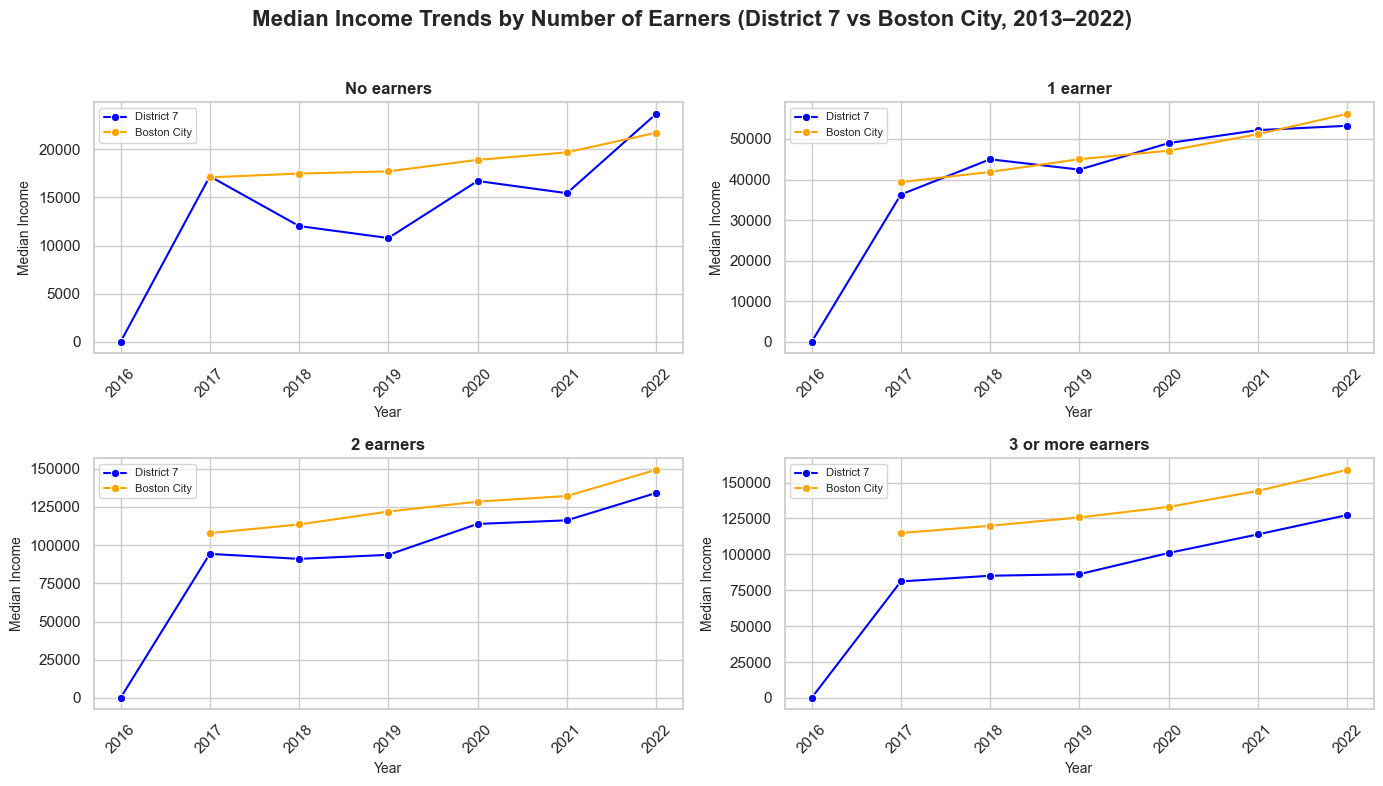

In [255]:
sns.set_theme(style="whitegrid")
earner_categories = ['No earners', '1 earner', '2 earners', '3 or more earners']

n_categories = len(earner_categories)
n_cols = 2 
n_rows = math.ceil(n_categories / n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharey=False)
axes = axes.flatten()  

# Loop through each earner category and respective subplot
for i, earner_group in enumerate(earner_categories):
    district_earner_data = group5_data[group5_data['Grouping'] == earner_group]
    city_earner_data = group5_citydata[group5_citydata['Grouping'] == earner_group]

    if not district_earner_data.empty:
        sns.lineplot(
            data=district_earner_data,
            x='Year',
            y='Median Income',
            marker='o',
            label=f'District 7',
            color='blue',
            ax=axes[i] 
        )
    if not city_earner_data.empty:
        sns.lineplot(
            data=city_earner_data,
            x='Year',
            y='Median Income',
            marker='o',
            label=f'Boston City',
            color='orange',
            ax=axes[i]  
        )
    axes[i].set_title(f'{earner_group}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylabel('Median Income', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    unique_years = sorted(group5_data['Year'].dropna().unique())
    axes[i].set_xticks(unique_years)
    handles, labels = axes[i].get_legend_handles_labels()
    if handles:
        axes[i].legend(fontsize=8, loc='upper left')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Median Income Trends by Number of Earners (District 7 vs Boston City, 2013–2022)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

##### **Insights:**

The plot reveals that median income increases with the number of earners in both District 7 and Boston City. For households with no earners, Boston City consistently outpaces District 7, though the gap narrows over time. For 1-earner households, incomes in both areas converge significantly, showing similar trends by 2022. 2-earner households in Boston City maintain a noticeable income advantage over District 7, although the gap remains relatively steady. Households with 3 or more earners exhibit the highest incomes, with Boston City consistently outperforming District 7, emphasizing a persistent disparity in higher-income categories despite growth across both regions. This suggests that increasing earners positively impacts income, but regional disparities persist.

##### **3.7 Median Income trends by non-family households (D7 vs Boston city)**

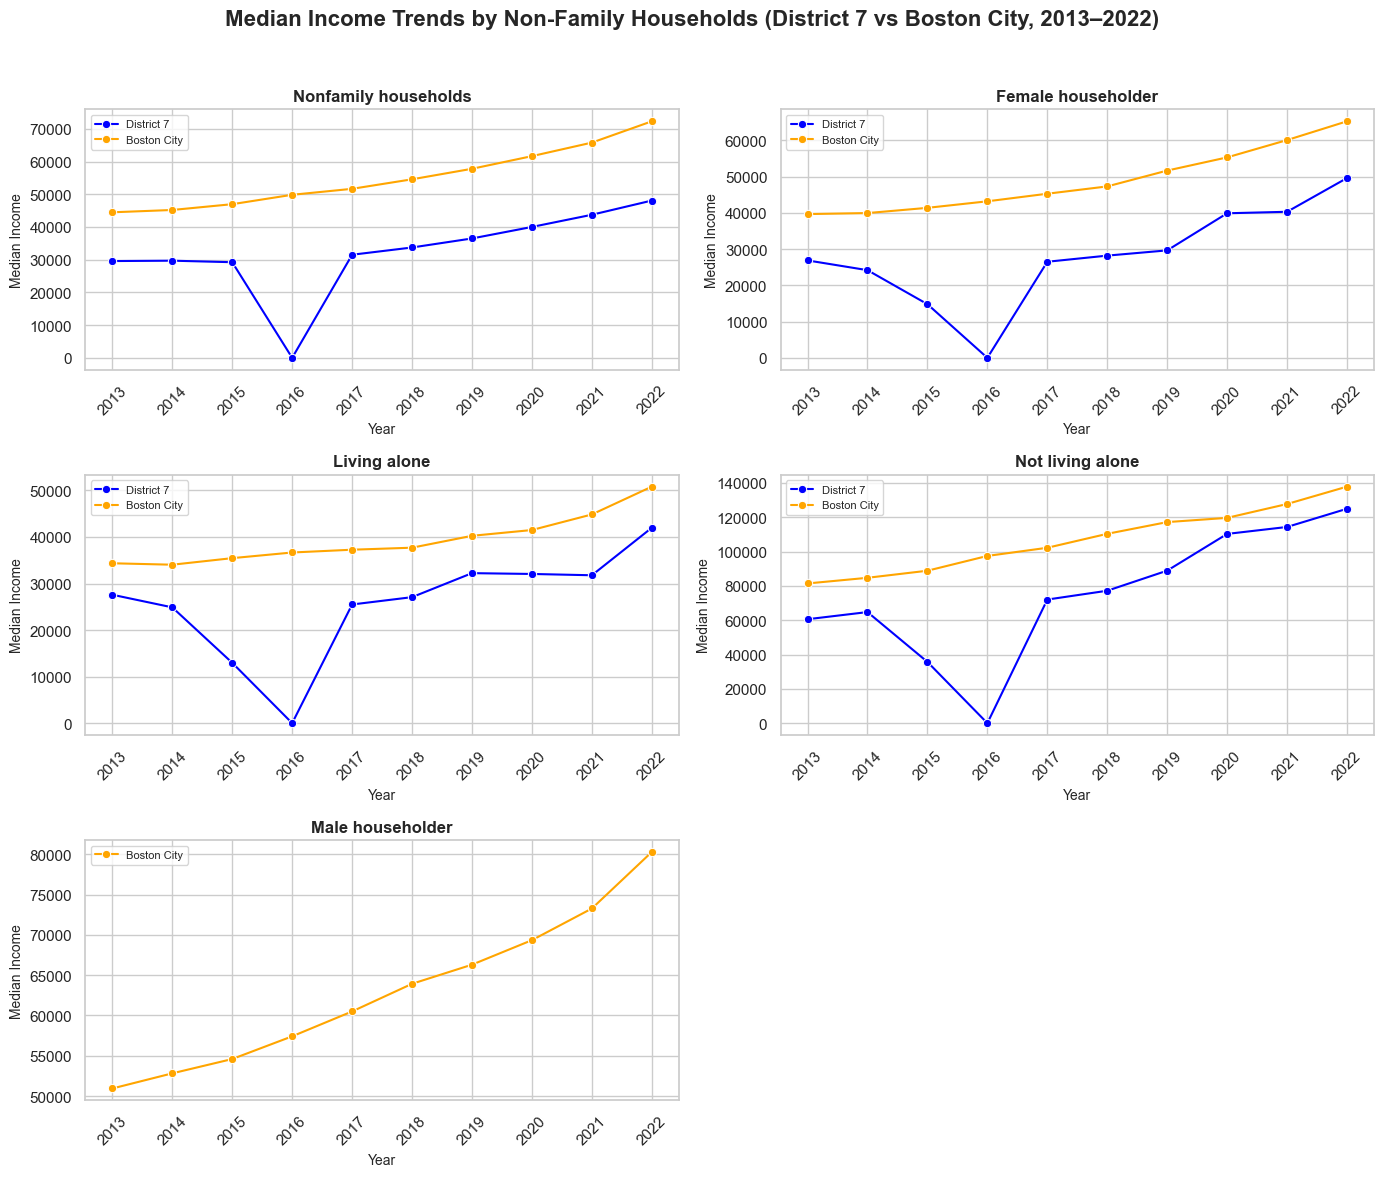

In [256]:
sns.set_theme(style="whitegrid")
nonfamily_categories = [
    'Nonfamily households', 'Female householder', 'Living alone', 
    'Not living alone', 'Male householder'
]
n_categories = len(nonfamily_categories)
n_cols = 2  
n_rows = math.ceil(n_categories / n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 4), sharey=False)
axes = axes.flatten() 

# Loop through each nonfamily category and respective subplot
for i, nonfamily_group in enumerate(nonfamily_categories):
    district_nonfamily_data = group6_data[group6_data['Grouping'] == nonfamily_group]
    city_nonfamily_data = group6_citydata[group6_citydata['Grouping'] == nonfamily_group]

    if not district_nonfamily_data.empty:
        sns.lineplot(
            data=district_nonfamily_data,
            x='Year',
            y='Median Income',
            marker='o',
            label=f'District 7',
            color='blue',
            ax=axes[i],
            errorbar = None 
        )
    if not city_nonfamily_data.empty:
        sns.lineplot(
            data=city_nonfamily_data,
            x='Year',
            y='Median Income',
            marker='o',
            label=f'Boston City',
            color='orange',
            ax=axes[i],
            errorbar = None  
        )
    axes[i].set_title(f'{nonfamily_group}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Year', fontsize=10)
    axes[i].set_ylabel('Median Income', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    unique_years = sorted(group6_data['Year'].dropna().unique())
    axes[i].set_xticks(unique_years)
    handles, labels = axes[i].get_legend_handles_labels()
    if handles:
        axes[i].legend(fontsize=8, loc='upper left')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
fig.suptitle('Median Income Trends by Non-Family Households (District 7 vs Boston City, 2013–2022)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### **Insights:**

The plot highlights disparities in median income trends for non-family households between District 7 and Boston City from 2013 to 2022. Across all categories, Boston City consistently outpaces District 7. Non-family households and individuals living alone show a substantial income gap, although District 7 exhibits steady growth over the years. The category of not living alone demonstrates higher incomes compared to other non-family households, with District 7 narrowing the gap with Boston City in recent years. 

For female householders, incomes in District 7 remain significantly lower, reflecting economic challenges in this group. Notably, male householders in Boston City show a consistent upward trend, reaching the highest income levels by 2022, while comparable data for District 7 is absent. These patterns emphasize persistent income disparities and highlight the need for targeted interventions for non-family households in District 7.

#### **4. Conclusion**




The comparative analysis of median income trends between District 7 and Boston City from 2013 to 2022 reveals persistent and significant income disparities across various household categories. Boston City consistently exhibits higher median incomes across all groups, with particularly pronounced gaps in non-family households, racial and ethnic categories, and households with no earners or single earners. Despite some growth 
in District 7’s incomes over the years, the rate of increase often lags behind Boston City, indicating systemic economic challenges.

Key findings show that families and households with multiple earners tend to fare better in narrowing the income gap, whereas vulnerable groups such as female householders, individuals living alone, and racial minorities in District 7 continue to face economic disadvantages. Moreover, Boston City demonstrates stronger and more consistent growth trends, reflecting broader economic advantages not mirrored in District 7.